In [33]:
import igraph.test
from igraph import *
import csv
import numpy as np
import networkx as nx
import operator
import copy
from IPython.core.display import display, SVG
import math

In [34]:
#This is the function to create a graph of networkx

#arguments: number of nodes in the graph, file name of graph, bool if the graph is weighted or not(default is weighted)
#returns: Graph object type of networkx
def create_nx_graph(n,file,is_weighted=True):
    G=nx.Graph()
    edges = []
    f = open(file, 'r')
    edges_str = [line.split('\n') for line in f.readlines()]
    edges = []
    for i in edges_str[2:]:
        lst = i[0].split(' ')
        #iterates through every line in the file and add edges 
        G.add_edge(int(lst[0]),int(lst[1]),weight=int(lst[2]))
    
    return G

Creating iGraph and nxGraph object of moreno_train datasets

In [35]:
crimefile = open("Datasets/moreno_train/terrorist.txt", 'r')
names = [line.split('\n') for line in crimefile.readlines()]
terrorist_names = []
for i in names:
    terrorist_names.append(i[0])
    
with open("Datasets/moreno_train/out.moreno_train_train") as f:
    csvreader = csv.reader(f, delimiter = '\t')
    lines = [tuple(line[0].split()) for line in csvreader][2:]
    
Gm = igraph.Graph.TupleList(lines, directed = False,edge_attrs = ['weight'])
Gm.vs['label'] = terrorist_names # vertices are named with the terrorist names

nx_Gm = create_nx_graph(64,"Datasets/moreno_train/out.moreno_train_train")

###### We have used different centrality measures on Terrorist dataset and have summarized how our findings relate to what actually happened.

### Madrid Train Bombing dataset
This undirected network contains contacts between suspected terrorists involved in the train bombing
of Madrid on March 11, 2004 as reconstructed from newspapers.

A node represents a terrorist and an edge between two terrorists shows that there was a contact
between the two terrorists . The edge weights denote how 'strong' a connection was.

This includes friendship and co-participating in training camps or previous attacks.

64 vertices (terrorists) and 243 edges (contacts)

Undirected and Weighted graph

All the centrality measures are observed on this dataset

### Question 1a - Degree Centrality

"Jamal Zougam "


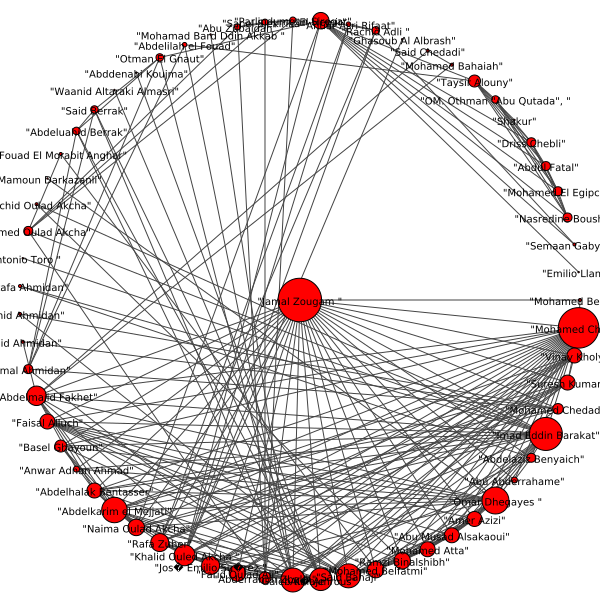

In [36]:
Gm.deg = [1.5*i for i in Gm.degree()] 
layout = Gm.layout("star")
out = plot(Gm,layout=layout,vertex_size=Gm.deg,vertex_label_size = 10)
# out.save('Outputs/1a.png')
print(terrorist_names[Gm.degree().index(max(Gm.degree()))])
out

### Observation

The terrorist with most number of connections.

In the plot above we can see that the node with max degree centrality is corresponding to Jamal Zougam who proved to be main suspect in the attack.

### Question 1b - Eccentricity

"Fouad El Morabit Anghar"


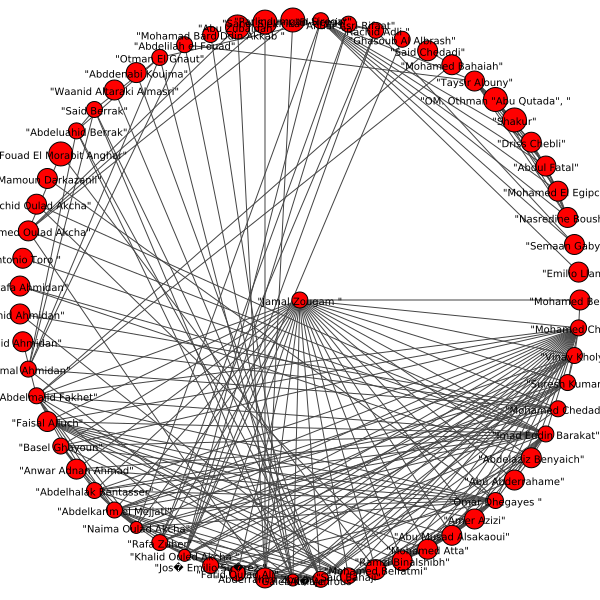

In [37]:
Gm.ecc = [4*i for i in Gm.eccentricity()]
layout = Gm.layout("star")
out = plot(Gm,layout=layout,vertex_size=Gm.ecc,vertex_label_size = 10)
out.save('Outputs/1b.png')
print(terrorist_names[Gm.eccentricity().index(max(Gm.eccentricity()))])
out

### Observation

Inverse of max distance from that node to any other node i.e., it is near to all other nodes.

Since the distance here represent the strength, the less the weight of edge(distance) the weak the connection is between the two nodes.So the node with less eccentricity is the one who is connected to farthest node also better, as we can see Jamal is one in first few of who have the strong connection even with the last person.

### Question 1c - Closeness

"Jamal Zougam "


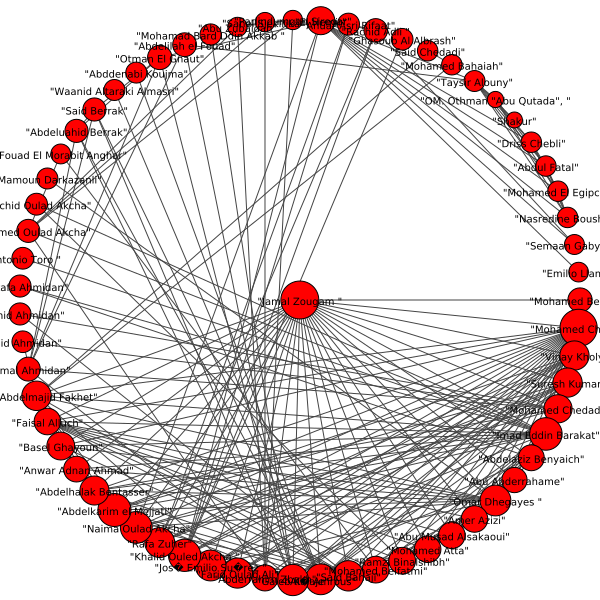

In [38]:
Gm.cls = [65*i for i in Gm.closeness()]
layout = Gm.layout("star")
out = plot(Gm,layout=layout,vertex_size=Gm.cls,vertex_label_size = 10)
out.save('Outputs/1c.png')
print(terrorist_names[Gm.closeness().index(max(Gm.closeness()))])
out

### Observation

Inverse of sum of distances to all the node.

The node which is close to most of the other nodes.

As we can see once again Jamal took his position in being the node with most closeness.He is the one where there are lot of connections and more strong connections.

### Question 1d - Radiality

"Jamal Zougam "


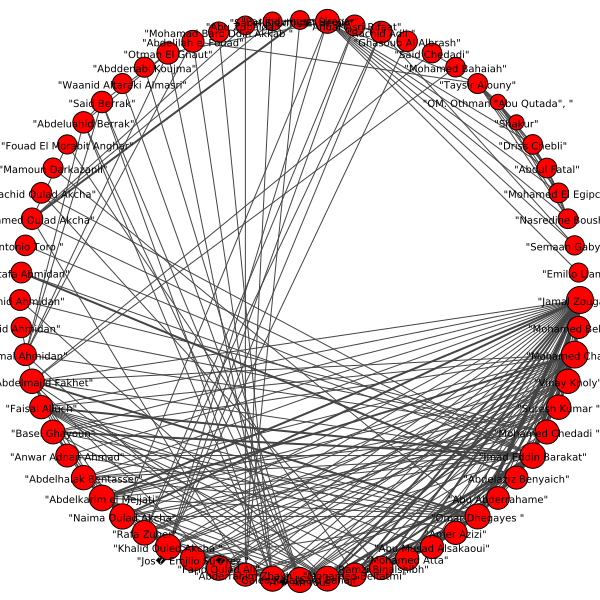

In [39]:
#arguments: iGraph object, number of nodes in the graph
#returns: List of all radiality values of the nodes in the graph
def radiality(G,n):
    dia = G.diameter()
    radiality_lst = []
    for i in range (n):
        sum_of_shortest = 0 # sum of shortest paths from node i to all other nodes
        for j in range (n):
            sum_of_shortest+= Gm.shortest_paths_dijkstra(source=(i), target=(j))[0][0]
        radiality_lst.append(((n*dia)+n-sum_of_shortest)/(n-1))#appending radiality of a node depending on sum_of_shortest
    return radiality_lst

radiality_list = radiality(Gm,64)
Gm.rad = [5*i for i in radiality_list]
layout = Gm.layout("circle")
out = plot(Gm,layout=layout,vertex_size=Gm.rad,vertex_label_size = 10,edge_width = [int(i) for i in Gm.es['weight']])
out.save('Outputs/1d.png')
print(terrorist_names[Gm.rad.index(max(Gm.rad))])
out

### Observation

Measure of how closely the node is integrated in the network (summation over one node(diameter-distance between 2
nodes))

As we can see almost every node is having same radiality, so we can conclude that almost every-one is closely integrated. The heighest on this centrality is also for Jamal.

### Question 1e - Stress Centrality

"Mohamed Chaoui"


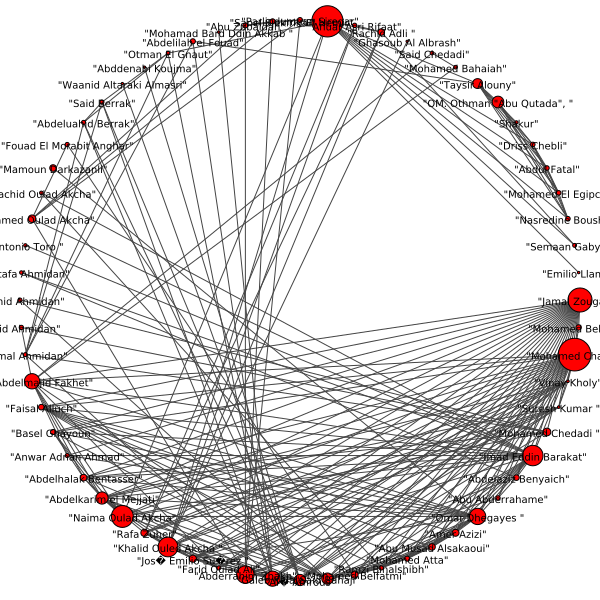

In [40]:
#arguments: iGraph object, number of nodes in the graph
#returns: List of all Stress centrality values of the nodes in the graph
def stress_centrality(G,n):
    s_paths = [] 
    for i in range (n):
        s_paths = s_paths+G.get_all_shortest_paths(i,weights= [int(i) for i in G.es['weight']], mode=OUT)
    nodes_s_paths = [] #list of all shortest paths between any pair of nodes in the graph
    for i in s_paths:
        nodes_s_paths = nodes_s_paths+i
    stress = []
    for i in range (n):
        stress.append(nodes_s_paths.count(i)) #counting number of shortest paths pass through s
    return stress


stress_centrality_lst = stress_centrality(Gm,64) 
Gm.str = [i/100 for i in stress_centrality_lst]
layout = Gm.layout("circle")
out = plot(Gm,layout=layout,vertex_size=Gm.str,vertex_label_size = 10)
out.save('Outputs/1e.png')
print (terrorist_names[stress_centrality_lst.index(max(stress_centrality_lst))])
out

### Observation

Number of shortest paths that pass through that node.If that node is removed many nodes will have to go in long path.

Here the maximum stress centrality is for Mohamed Chaoui who is the half brother to Jamal the main suspect of the attack.

So here we may think that lot of close relations to Jamal might be through Mohamed Chaoui.

### Question 1f - Betweenness Centrality

"El Hemir"


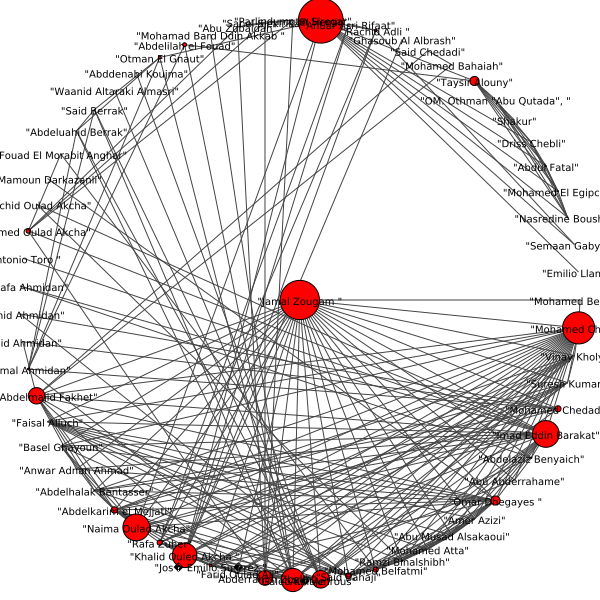

In [41]:
Gm.bet = [i/10 for i in Gm.betweenness()]
layout = Gm.layout("star")
out = plot(Gm,layout=layout,vertex_size=Gm.bet,vertex_label_size = 10)
out.save('Outputs/1f.png')
print(terrorist_names[Gm.bet.index(max(Gm.bet))])
out

### Observation

Ratio of number of shortest paths between any 2 pairs of nodes passing through a node.

This centrality is high for El Hamir (some terrorist are connected only through him in the network).

### Question 1g - Flow Vitality

"El Hemir"


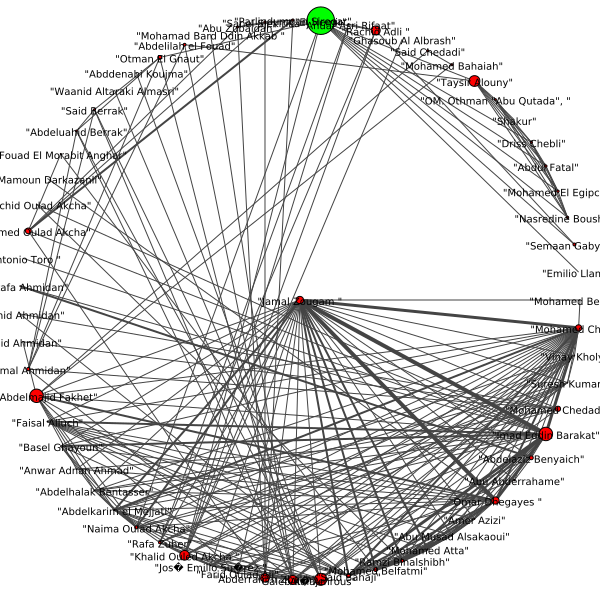

In [42]:
#arguments: list of graph attributes, number of nodes in the graph
#returns: List of all Flow Vitality values of the nodes in the graph
def flow_vitality(lines,n):
    G = igraph.Graph.TupleList(lines, directed = False,edge_attrs = ['weight'])
    flow = np.ones(shape=(n,n))
    for i in range(0,n):
        for j in range(0,n):
            if(i!=j):
                flow[i][j] = G.maxflow(i, j, capacity=G.es['weight']).value
                
    flow_vitalities = np.zeros(shape=n)
    for u in range(0,n):
        #u is the node that is deleted in the graph->iterating through graph deleting every node and finding flow id rest of the graph
        orig_graph = igraph.Graph.TupleList(lines, directed = False,edge_attrs = ['weight'])
        orig_graph.delete_vertices(u)
        orig_flow = np.delete(flow,u,axis=0)
        orig_flow = np.delete(orig_flow,u,axis=1)
        curr_flow = np.ones(shape=(n-1,n-1))
        for i in range(0,n-1):
            for j in range(0,n-1):
                if(i!=j):
                        curr_flow[i][j] = orig_graph.maxflow(i, j, capacity=orig_graph.es['weight']).value
        
        ratio = np.sum(curr_flow/orig_flow) #curr_flow is flow when node u is deleted and orig_flow is flow of the original graph
    
        flow_vitalities[u] = ((n-1)*(n-1))-ratio
    return flow_vitalities


flows = flow_vitality(lines,64)

col = ['red' for i in range(64)]
flow_vital_max = np.argmax(flows)
col[flow_vital_max] = 'green'
Gm.vs['color'] = col

Gm.flw = [i/25 for i in flows]
layout = Gm.layout("star")
out = plot(Gm,layout=layout,vertex_size=Gm.flw,vertex_label_size = 10,edge_width = [int(i) for i in Gm.es['weight']])
out.save('Outputs/1g.png')
print(terrorist_names[flow_vital_max])
out

### Observation

This tells if a particular node is removed how much there will be decrease in flow. If a node is having high flow vitality it means removing that node will decrease the flow in the network. 

Maximum flow vitality is El Hemir.

Because by removing him the graph would be disconnected some of the terrorists are involved only through him. The flow vitality of Jamal is less because the connections he had are popular members connections, who are connected to lot other people also. So even if he is removed the information can be circulated among all.

If we have to remove any node to reduce the imformation that is passed among the network, we have to target the node with high flow vitality

### Question 1h - Closeness Vitality

"Parlindumgan Siregar"


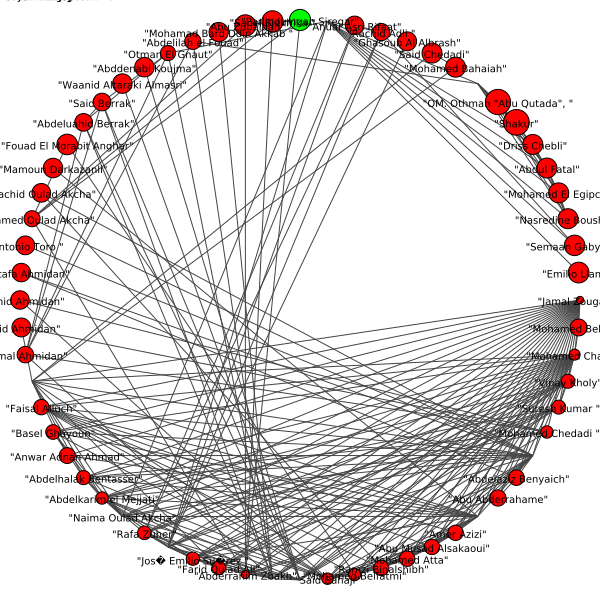

In [43]:
close_vitality = nx.closeness_vitality(nx_Gm)

max_val = max(close_vitality.items(), key=operator.itemgetter(1))[0]
col = ['red' for i in range(64)]
col[max_val] = 'green'
Gm.vs['color'] = col

Gm.str = [i/10 for i in close_vitality.values()]
layout = Gm.layout("circle")
out = plot(Gm,layout=layout,vertex_size=Gm.str,vertex_label_size = 10)
out.save('Outputs/1h.png')
print(terrorist_names[max_val])
out

### Observation

Extent at which cost of all pairs of communication increases with the removal of a node.

Diff between Wiener index with and without that node.(Wiener index is summation of all pairs shortest paths).

This is maximum for Parlindumgan Siregar.

### Question 1i - Stress Vitality

/home/rohith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:4861


"Mohamed Chaoui"


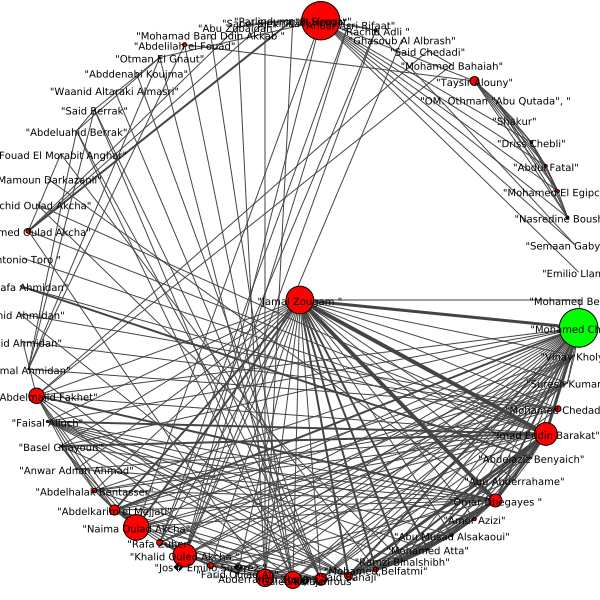

In [44]:
#arguments: list of graph attributes, number of nodes in the graph
#returns: List of all Stress Vitality values of the nodes in the graph
def stress_vitality(lines,n):
    G = igraph.Graph.TupleList(lines, directed = False,edge_attrs = ['weight'])
    #orig_shortest_paths - list of all shortest paths between every pair of nodes
    orig_shortest_paths = G.shortest_paths_dijkstra(weights=[int(i) for i in G.es['weight']]) 
    orig_no_shortest_paths = [] #Matrix in which (i,j)th element siginifies the number of shortest paths form node i to node j
    for i in range (n):
        lst = []
        for j in range (n):
            lst.append(len(G.get_all_shortest_paths(i,j,weights=[int(k) for k in G.es['weight']])))
        orig_no_shortest_paths.append(lst)
    
    stress_vitalities = []
    for x in range (n):
        #only node x is removed and computed shortest paths. x is iterated over all nodes in the graph
        orig_G = igraph.Graph.TupleList(lines, directed = False,edge_attrs = ['weight'])
        orig_G.delete_vertices(x)
        
        orig_shortest_paths_del = copy.deepcopy(orig_shortest_paths)
        for row in orig_shortest_paths_del:
            del row[x]
        del orig_shortest_paths_del[x]
        
        orig_no_shortest_paths_del = copy.deepcopy(orig_no_shortest_paths)
        for row in orig_no_shortest_paths_del:
            del row[x]
        del orig_no_shortest_paths_del[x]
        
        shortest_paths_del = orig_G.shortest_paths_dijkstra(weights=[int(i) for i in orig_G.es['weight']])
        no_shortest_paths_del = []
        for i in range (n-1):
            lst = []
            for j in range (n-1):
                lst.append(len(orig_G.get_all_shortest_paths(i,j,weights=[int(k) for k in orig_G.es['weight']])))
            no_shortest_paths_del.append(lst)
            
        sv_x = 0
        #finding the decrese in number of shortest paths by removing node x
        for i in range (n-1):
            for j in range (n-1):
                if(shortest_paths_del[i][j]==orig_shortest_paths_del[i][j]):
                    #if the distance of shortest path dosen't change the find the diff in number of shortest paths from node i to node j 
                    sv_x = sv_x+(orig_no_shortest_paths_del[i][j]-no_shortest_paths_del[i][j])
                else:
                    #if distance of shortest path increses(changes) then add all the number of shortest paths in the original graph from node i to node j
                    sv_x = sv_x+orig_no_shortest_paths_del[i][j]
        stress_vitalities.append(sv_x)
    return stress_vitalities


stresses = stress_vitality(lines,64)

stress_vital_max = stresses.index(max(stresses))
col = ['red' for i in range(64)]
col[stress_vital_max] = 'green'
Gm.vs['color']=col

Gm.str = [i/75 for i in stresses]
layout = Gm.layout("star")
out = plot(Gm,layout=layout,vertex_size=Gm.str,edge_width = [int(i) for i in Gm.es['weight']],vertex_label_size = 10)
out.save('Outputs/1i.png')
print(terrorist_names[stress_vital_max])
out

### Observation

Shortest paths that have remained same before and after the removal of a particular node.

This measure of centrality will be more if the stress on that node is more.

So this is maximum for Mohamed Chaoui and can draw similar conclusions as stress of that node is maximum.

### Summary

All the centralities are observed on the moreno_train dataset(weighted) which is data set on Terrorist data of Train Bombing in Madrid. Weights represent the strength of connection between the terrorists.

In most of the centrality measures are having maximum value for- 

1.Jamal Zougam who is the main suspect of Madrid Train Bombing

2.Mohammed Chaoui who is half brother of Jamal Zougam

3.El Hemir who is lawer for Jamal Zougam

So our findings are comparable to the originally found main suspect - Jamal Zougam

## Accidents rates in USA - Betweenness centrality

DATASET : ‘CONTIGUOUS USA’

This undirected weighted network contains the weights for the borders of the 49 connected started of the USA.

There are  49 nodes and  109 edges.

Each node is a state.

Each edge is a border.

## OBSERVATIONS:

We know that edge betweenness: is the thickest edge. So,more the edge betweenness, more there are shortest paths between the two nodes connecting this edge.

As we observe in the graph, the edges between WY and PA ,MO and KY,OH and PA,TN and MO,MO and NE are really thick and prominent.So,these edges have more edge betweenness, more shortest paths between them.

So,this can be inferred as more shortest paths means more people travel on these roads.This could lead to 
more  road accidents.

This data is clearly observed when we see the stats for accidents in USA:

Wyoming (WY)- 21.2 deaths per 100000 population

Montana(MO)  - 17.7 deaths per 100000 population

Oklahoma (OH) - 16.7 deaths per 100000 population

Kentucky (KY) - 17.6 deaths per 100000 population

Tennessee (TN)- 15.5 deaths per 100000 population

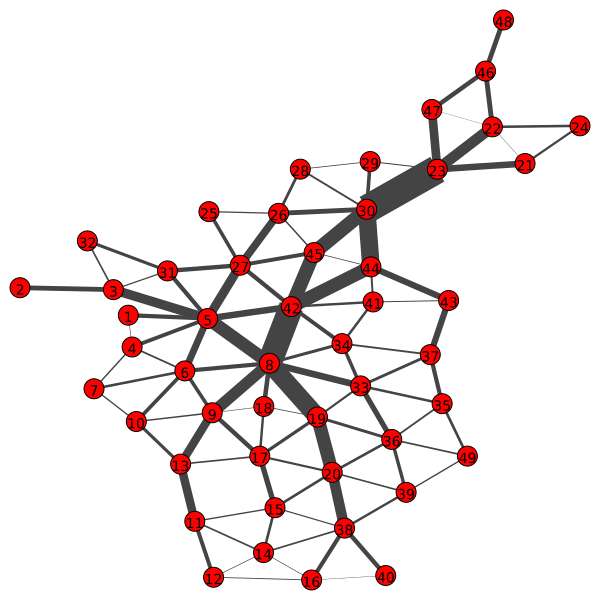

In [45]:
import csv
with open("./Datasets/contiguous-usa/out.contiguous-usa")as f:
    csvreader = csv.reader(f, delimiter = '\t')
    lines = [tuple(line[0].split()) for line in csvreader][2:]
g = Graph.TupleList(lines, directed = False)
g.bet = [ i/10 for i in g.edge_betweenness()]
g.vs["label"] = g.vs["name"]
plot(g, layout = g.layout("kk"), edge_width = g.bet)

### Question 2 - Graph Properties

Dataset : Dolphins 

This is a Undirected social network of bottlenose dolphins. 

The nodes are the bottlenose dolphins of a bottlenose dolphin community. 

An edge indicates a frequent association. 

62 vertices (network is connected).

159 edges (associations)


### Question 2a - Weiner Index

In [1]:
import igraph.test
from igraph import *
import csv
import numpy as np
import networkx as nx
import operator
import copy
from IPython.core.display import display, SVG
import math

#This is the function to create a graph of networkx

#arguments: number of nodes in the graph, file name of graph.
#returns: Graph object type of networkx
def create_nx_graphu(n,file):
    G=nx.Graph()
#     G.add_nodes_from([1,n])
    edges = []
    f = open(file, 'r')
    edges_str = [line.split('\n') for line in f.readlines()]
    edges = []
    for i in edges_str:
        lst = i[0].split('\t')
        G.add_edge(int(lst[0]),int(lst[1]))
    
    return G

In [2]:
Gd = create_nx_graphu(62,"Datasets/dolphins/out.dolphins")
Gd.nodes()
nx.wiener_index(Gd)

6348.0


Connected So the Weiner Index is not infinity. 

Given a graph G = (V,E) the Wiener Index is defined as the sum of all distances over all vertex pairs.

We used Networkx module to find out the Wiener Index of this graph.

This is Weiner Index for the dolphin data set. From this we can infer that all the nodes in this graph are connected. Because graphs where the nodes are not connected have infinite Wiener index. We have compared this weiner index with high school dataset that's used later in this notebook where the graph is more dense so has more weiner index. This shows that humans form more dense ralations than dolphins.


Because graphs where the nodes are not connected have infinite Wiener index.


### Question 2b - Max clique

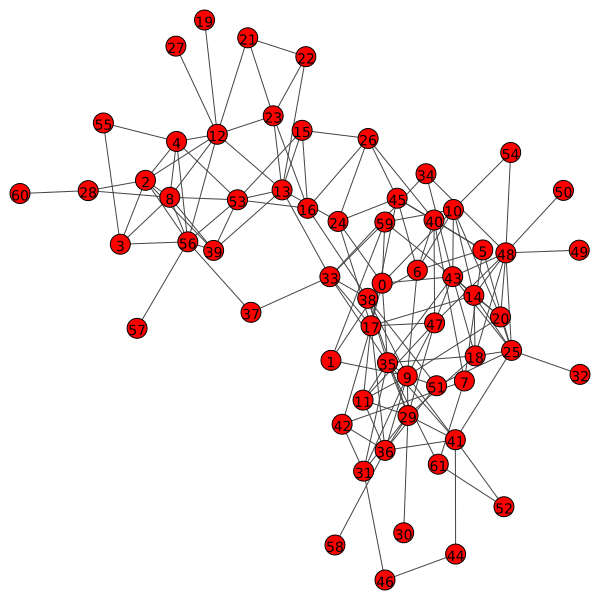

In [3]:
with open("Datasets/dolphins/out.dolphins") as f:
    csvreader = csv.reader(f, delimiter = ' ')
    lines = [tuple(line[0].split()) for line in csvreader]
Gm = igraph.Graph.TupleList(lines, directed = False, edge_attrs = ['weight'])
Gm.vs['label'] = [str(i) for i in range(0,62)]
plot(Gm)

[(56, 8, 2, 4, 12), (48, 43, 14, 25, 20), (48, 43, 14, 25, 18)]


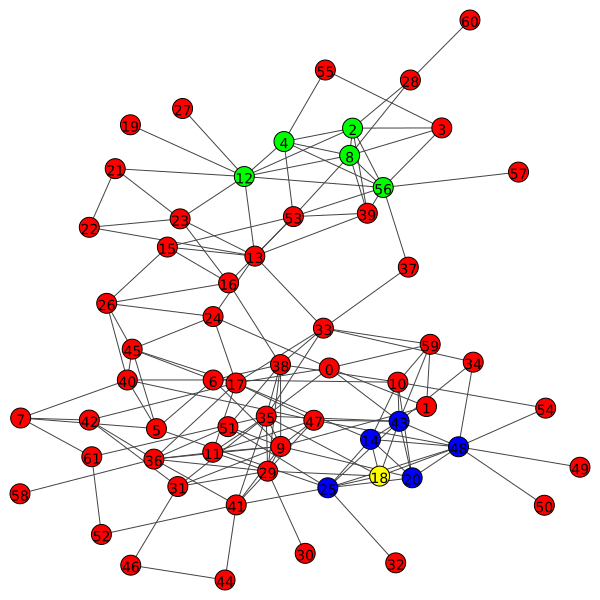

In [4]:
t = Gm.largest_cliques()
print(t)
col = []
for i in range(0,62):
    if i in t[0]:
        col.append('green')
    elif i in t[1]:
        col.append('blue')
    elif i in t[2]:
        col.append('yellow')
    else:
        col.append('red')
Gm.vs['color'] = col
out = plot(Gm)
# out.save('Outputs/2b.png')
out

we can see the max cliques of the graph colored. And observe that all are 5-cliques and are strongly connected. Here we can see that there are two sets of maximal cliques (48, 43, 14, 25, 20), (48, 43, 14, 25, 18) where 4 nodes are common.

Also called as Perfectly dense groups.

Given a graph G = (V,E) a subset of nodes(U) is a Clique if G(U) is a complete graph.

3 max cliques of size 5 were detected. 


### Question 2c - Plex

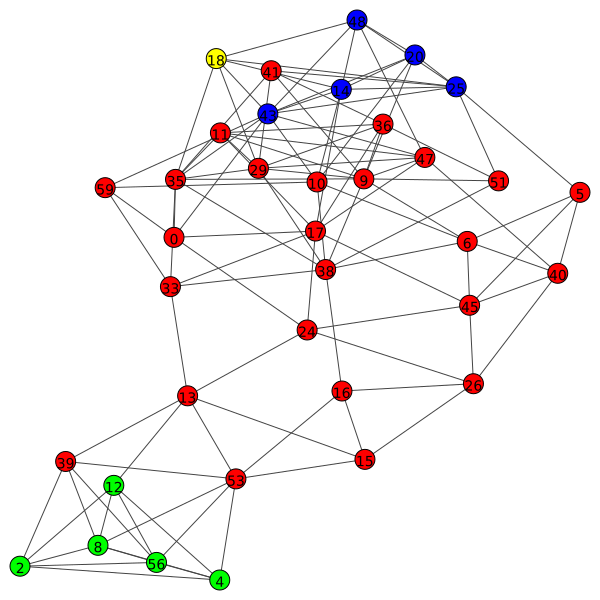

In [5]:
l = Gm.k_core()
out = plot(l[4])
# out.save('Outputs/2c-d.png')
out

An N-core is an (n-N)-plex. here plotted 4-core is (62-4)-plex i.e 58-plex. where the node is allowed to miss 58 edges to it has to only have minimum of 4 edges. which is the exact definition of 4-core.

### Question 2d - Core

The above plot shows the 4-core subgraph of the dolphins dataset. We can see that all the nodes that have minimum degree of 4 have been plotted in the graph which included 5-cliques as they have minimum of 4 degree. 

A “plex” is a generalization on the concept of a clique, where nodes are allowed to “miss” having edges with other nodes.
Also any N-core is an (n-N)-plex.

Given a graph G = (V,E) a subset of nodes U is said to be an N-core iff minimum degree in U is at least N.

Gd.k_core()
returned : list of graphs with k cores, k=1,2….n.

This is a 5-Core plot where subset of nodes have minimum degree of at least 5.

We can see that all the cliques of size 5 were included.


###### Interesting Observations

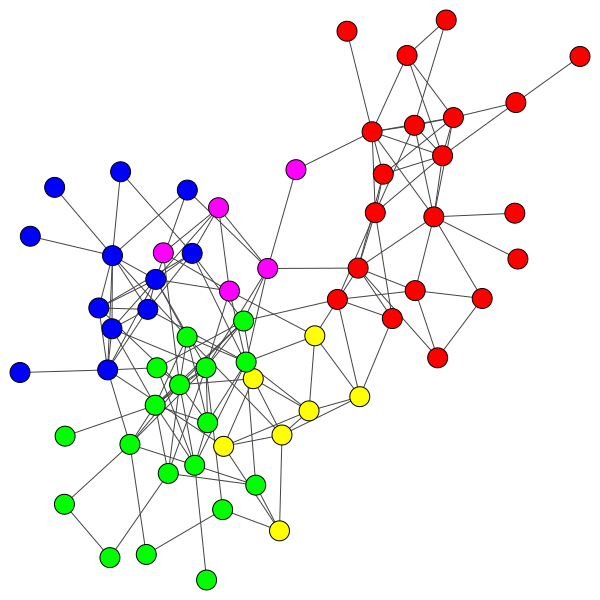

In [6]:
Gm = igraph.Graph.TupleList(lines, directed = False, edge_attrs = ['weight'])
Gm.vs['labels'] = Gm.vs['name']
i = Gm.community_infomap()
pal = igraph.drawing.colors.ClusterColoringPalette(len(i))
Gm.vs['color'] = pal.get_many(i.membership)
out = plot(Gm)
# out.save('Outputs/Community_Dolphins.png')
out

Group compositions are usually determined by sex, age, reproductive condition, familial relations and affiliation histories. In a dolphin community near Sarasota, Florida, the most common group types are adults 

Using community info map we see that :

The pink and yellow ones are : Adult males live mostly two to three, and join pods for short periods of time. 

The green,red and blue ones are : Adult females and young dolphins normally live in groups of up to 15 animals.

The sky blue ones are : females with their recent offspring, older subadults of both sexes and adult males either alone or in bonded pairs. 


source : https://en.wikipedia.org/wiki/Bottlenose_dolphin#Social_interaction


### Question 3
#### Community detection

###### Highschool dataset
This dataset contains relations between students of a school. The data is collected twice. Once in fall and once in spring. In the below plot, blue edges represent the relations formed first and green represent the relations formed later. This dataset allows to experiment with the community formation process.

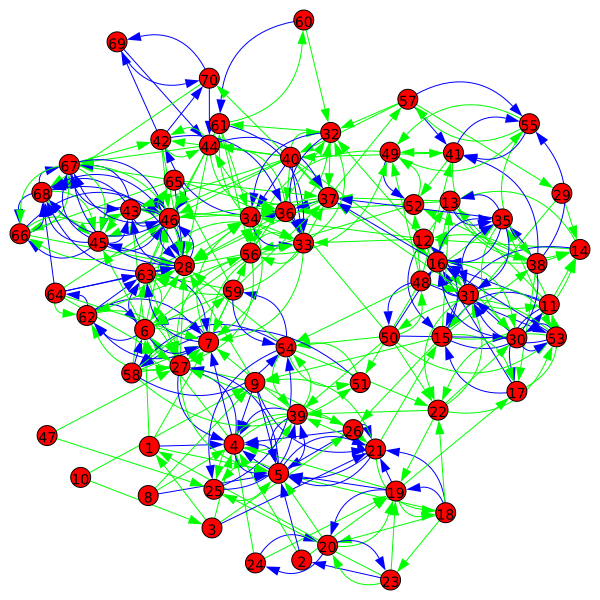

In [7]:
with open("./Datasets/moreno_highschool/out.moreno_highschool_highschool") as f:
    csvreader = csv.reader(f, delimiter = '\t')
    lines = [tuple(line[0].split()) for line in csvreader][2:]
g = Graph.TupleList(lines, directed = True, weights = True)
g.deg = [i*3 for i in g.degree()]
g.vs["label"] = g.vs["name"]
colors = ["green" if i['weight'] == '1' else "blue" for i in g.es]
g.es['color'] = colors
plot(g, layout = g.layout("kk"))

Community detection algorithm - remove the edge with highest betweeness until high modularity is above a certain threshold
From the results, it can be noticed that green edges get deleted more and deletion of green edges results in forming communities.

CODE IN community.py

In [8]:
# Code moved to community.py

###### Observation 
From below it can be seen that while green edges connected nodes from inter and intra communities, blue edges are mostly inter community indicating when a group comes together, the first relations formed defines the structure of communities.


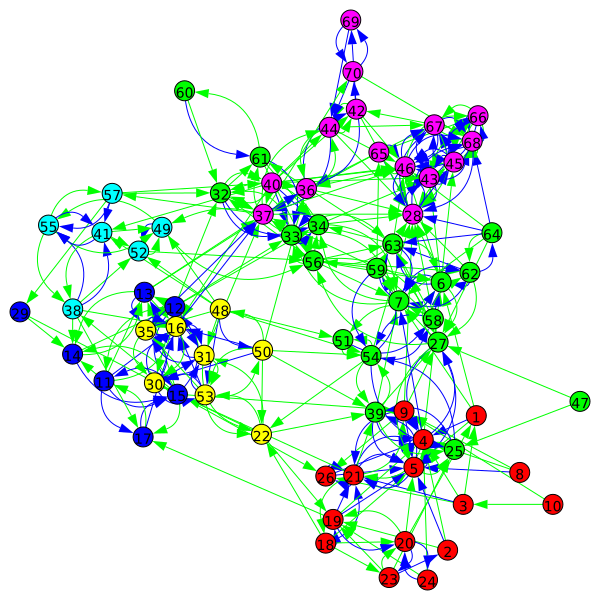

In [9]:
plot(g.community_walktrap().as_clustering())

### Question 4 - PageRank and HITS

We used cfinder-google dataset for this question.It is a hyperlink dataset and has 15k vertices,each vertex represents a web page.Basically,the pagerank and hits algorithms are used measure the relative importance of web pages.  

In [10]:
#num of vertices, file name of edges
def create_nx_graph(file):
    G=nx.DiGraph()
    edges = []
    f = open(file, 'r')
    edges_str = [line.split('\n') for line in f.readlines()]
    edges = []
    for i in edges_str:
        lst = i[0].split(' ')
        G.add_edge(int(lst[0]),int(lst[1]))
    
    return G

Above given function is used to create a graph in networkX(python library).Create the graph and find hits and pagerank values.
The hits algorithm returns two values:
1)authority value and
2)hub value.

In [11]:
Gr = create_nx_graph("Datasets/cfinder-google/out.cfinder-google")
hubs,auth=nx.hits(Gr,normalized=True)
hubs = [v for k, v in hubs.items()] 
auth = [v for k, v in auth.items()] 
pag=nx.pagerank(Gr)
pag =[v for k, v in pag.items()] 

The richlcub funtion returns a subgraph which contains nodes with high scores.scores can be anything ,in our case it is either pagerank or authority value.  

In [12]:
def richclub(graph, fraction=0.005,highest=True, scores=None, indices_only=False):
    """Extracts the "rich club" of the given graph, i.e. the subgraph spanned
    between vertices having the top X% of some score.
 
    Scores are given by the vertex degrees by default.
 
    @param graph:    the graph to work on
    @param fraction: the fraction of vertices to extract; must be between 0 and 1.
    @param highest:  whether to extract the subgraph spanned by the highest or
                     lowest scores.
    @param scores:   the scores themselves. C{None} uses the vertex degrees.
    @param indices_only: whether to return the vertex indices only (and not the
                         subgraph)
    """
 
    if scores is None:
        scores = graph.pagerank()
 
    indices = list(range(len(graph)))
    indices.sort(key=scores.__getitem__)
 
    n = int(round(len(graph) * fraction))
    if highest:
        indices = indices[-n:]
    else:
        indices = indices[:n]
 
    if indices_only:
        return indices
 
    return graph.subgraph(indices)

To make plotting easier we used igraph instead of networkX.So load the same graph again using igraph.All the values are calculated using inbuilt networkX function and igraph is used just for plotting the graph. 

In [14]:
import csv
with open(r"Datasets/cfinder-google/out.cfinder-google") as f:
    csvreader = csv.reader(f, delimiter = '\t')
    lines = [tuple(line[0].split()) for line in csvreader][2:]
Gm = igraph.Graph.TupleList(lines, directed =True)
Gm.vs['label']=[str(i) for i in range(Gm.vcount())]

Using richclub funtion we calculated the top 0.5% of nodes which has high pagerank values and these values are used to represent the relative size of each node in the plot. 

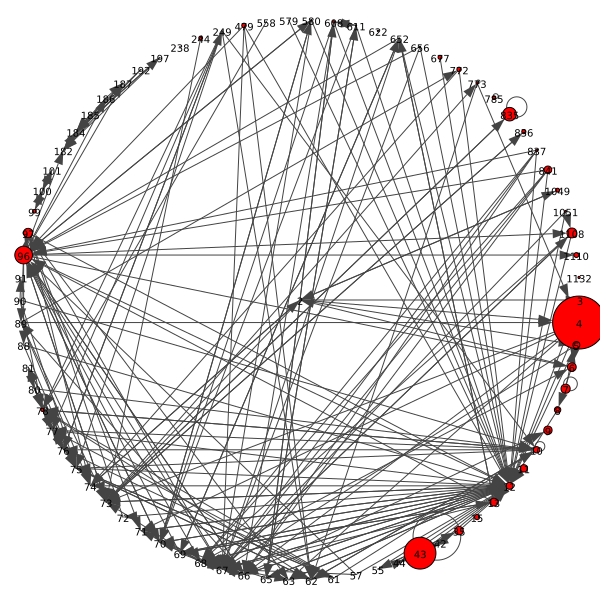

In [15]:
Grs1=richclub(Gr,scores=pag)
indices1=richclub(Gr,scores=pag,indices_only=True)
Gms1=Gm.subgraph(indices1)
Gms1.pr=[800*i for i in pag]
layout = Gms1.layout("star")
plot(Gms1,layout=layout,vertex_size=Gms1.pr,vertex_label_size = 10,edge_curved=False)

Similary,use richclub function to get the subgraph of 0.5% of web pages which has high hub value/authority value. 

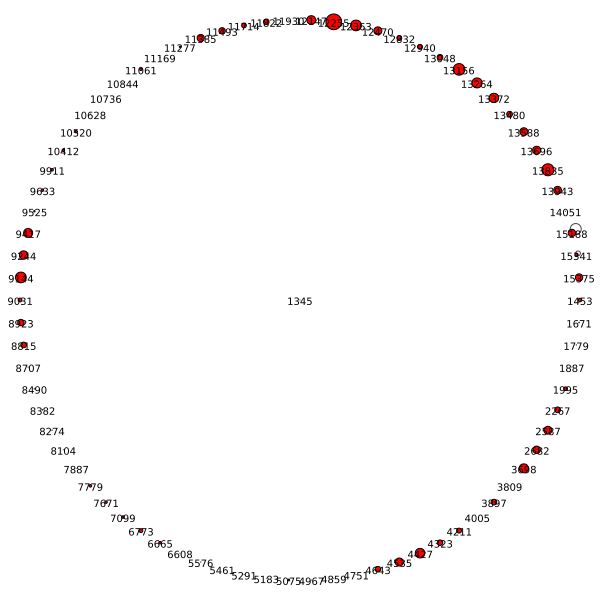

In [16]:
Grs2=richclub(Gr,scores=hubs)
indices2=richclub(Gr,scores=hubs,indices_only=True)
Gms2=Gm.subgraph(indices2)
Gms2.hub=[80000*i for i in hubs]
layout = Gms2.layout("star")
plot(Gms2,layout=layout,vertex_size=Gms2.hub,vertex_label_size = 10,edge_curved=False)

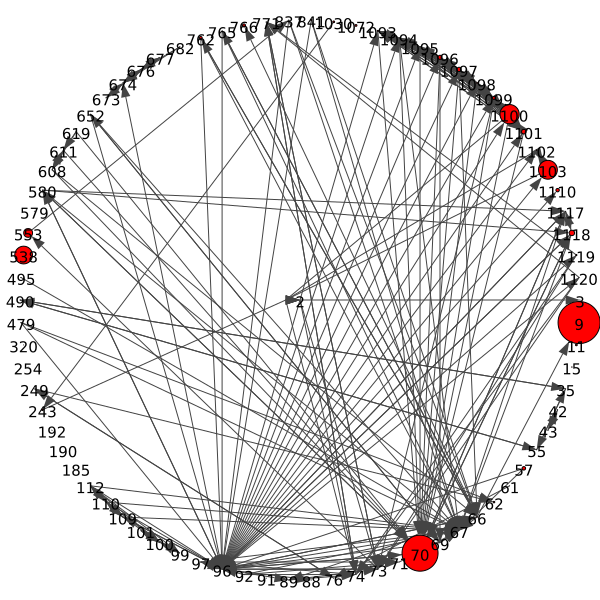

In [17]:
Grs3=richclub(Gr,scores=auth)
indices3=richclub(Gr,scores=auth,indices_only=True)
Gms3=Gm.subgraph(indices3)
Gms3.auth=[800*i for i in auth]
layout = Gms3.layout("star")
plot(Gms3,layout=layout,vertex_size=Gms3.auth,vertex_label_size = 15,edge_curved=False)

#### Observations:
    Though the algorithms are different,we can find similarities in plots of pagerank and authorities.The node which has high pagerank also has the high authority value.Node 0(represents google calander web page) has the highest pagerank value and the same node has the highest authority value. 

### Question 5
#### Genetating a graph with power law at different scales

Used configuration model. Showing that the graph is scale invariant at different scales.

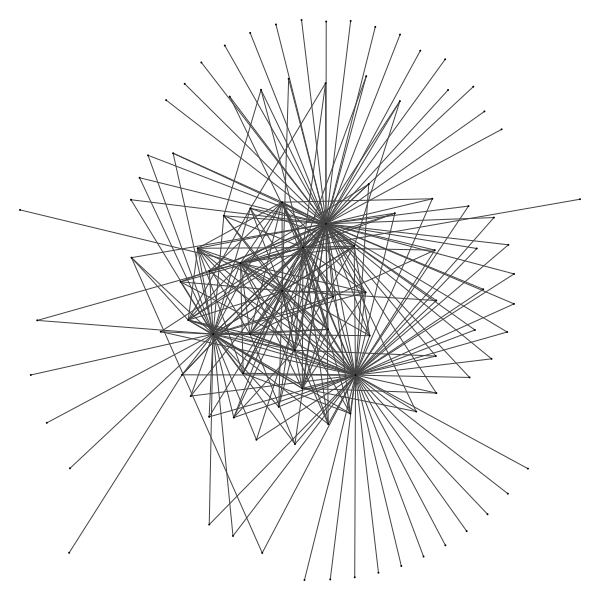

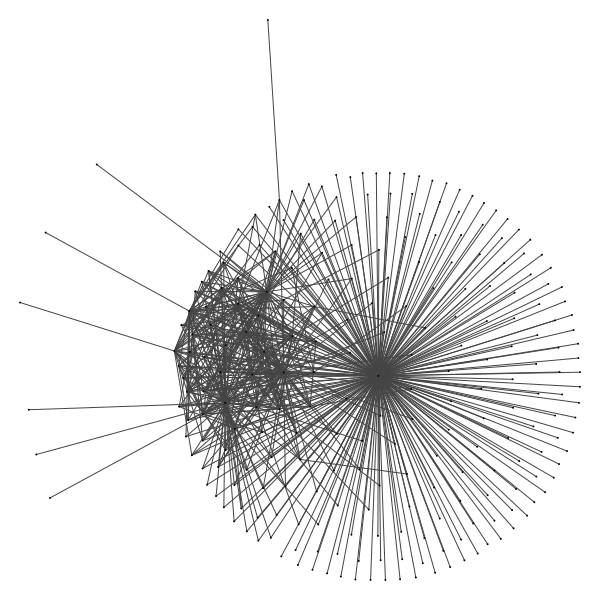

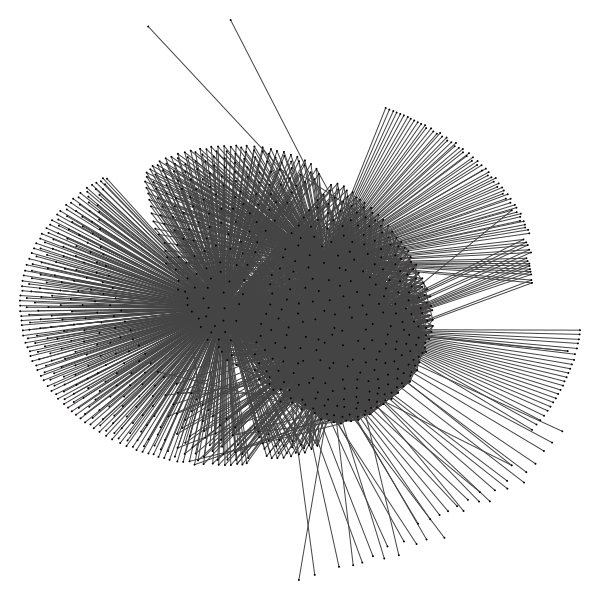

In [18]:
def power_law_graph(n):
    while True:  
        s=[]
        while len(s)<n:
            nextval = int(nx.utils.powerlaw_sequence(1, 1.5)[0]) # power-law exponent 1.5
            if nextval!=0:
                s.append(nextval)
        if sum(s)%2 == 0:
            break
    G = nx.configuration_model(s)
    G=nx.Graph(G) # remove parallel edges
    G.remove_edges_from(G.selfloop_edges())
    IG = Graph(len(G), list(zip(*list(zip(*nx.to_edgelist(G)))[:2])))
    
    return IG
for p in [100, 250, 1000]:
    g = power_law_graph(p)
    display(SVG(igraph.plot(g, layout = g.layout("kk"), vertex_size = 1)._repr_svg_()))


### Question  6 - Max clique around the node of max centrality is actually a max clique.


Dataset : Highschool

This directed network contains friendships between boys in a small highschool in Illinois. 

Each boy was asked once in the fall of 1957 and the spring of 1958. This dataset aggregates the results from both dates. 

A node represents a boy and an edge between two boys shows that the left boy chose the right boy as a friend. 

The edge weights show how often that happened. As a boy could choose the same boy twice edge values from 1 to 2 are allowed.


For a centrality measure (like betweenness or degree). 
To detect a max clique around the node with max centrality. 
To find the max cliques of the graph using inbuilt function
To compare and specify if the max clique around the node of max centrality is actually a max clique.

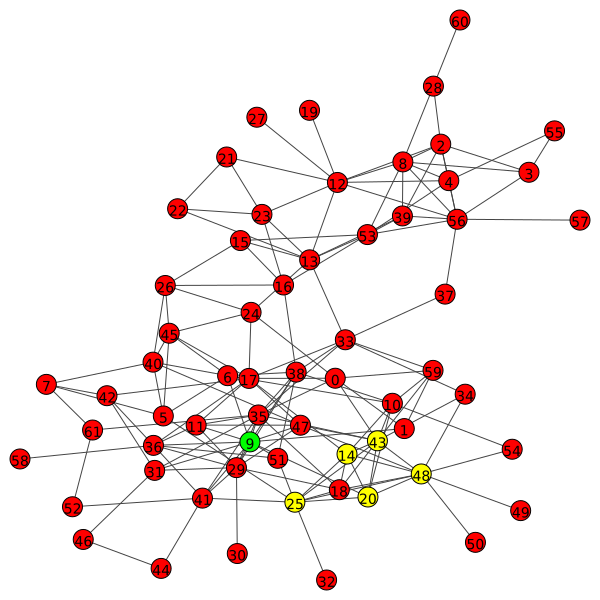

In [19]:
with open("Datasets/dolphins/out.dolphins") as f:
    csvreader = csv.reader(f, delimiter = ' ')
    lines = [tuple(line[0].split()) for line in csvreader]
Gm = igraph.Graph.TupleList(lines, directed = False, edge_attrs = ['weight'])
Gm.vs['label'] = [str(i) for i in range(0,62)]
l=Gm.betweenness()
max_index = l.index(max(l))
t = Gm.largest_cliques()
d = Gm.degree()
max_index = d.index(max(d))
col = []
for i in range(0,62):
    if( i == max_index ):
        col.append('green')
    elif i in t[1]:
        col.append('yellow')
    else:
        col.append('red')
Gm.vs['color'] = col
out = plot(Gm)
# out.save('Outputs/6d.png')
out

For degree centrality we observe of dolphin dataset that the max clique around the node of max degree centrality(9) is actually a max clique.

/home/rohith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: directionality of edges is ignored for directed graphs at cliques.c:908
  if __name__ == '__main__':


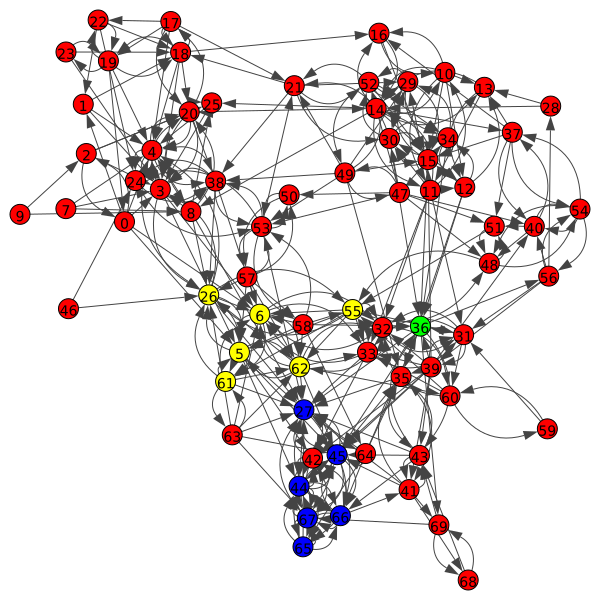

In [20]:
with open("Datasets/moreno_highschool/out.moreno_highschool_highschool") as f:
    csvreader = csv.reader(f, delimiter = '\t')
    lines = [tuple(line[0].split()) for line in csvreader]

Gm = igraph.Graph.TupleList(lines, directed = True, edge_attrs = ['weight'])
Gm.vs['label'] = [str(i) for i in range(0,70)]
l=Gm.betweenness()
max_index = l.index(max(l))
t = Gm.largest_cliques()
col=[]
for i in range(0,70):
    if( i == max_index ):
        col.append('green')
    elif i in t[0] :
        col.append('yellow')
    elif i in t[1] :
        col.append('blue')
    else:
        col.append('red')
Gm.vs['color'] = col
out = plot(Gm)
# out.save('Outputs/6b.png')
out

For betweenness centrality we observe of highschool dataset that the max clique around the node of max betweenness centrality(36) is actually a max clique. There is a direct edge connected between 36 and max cliques.

This directed network contains friendships between boys in a small highschool.  

A node represents a boy and an edge between two boys shows that the left boy chose the right boy as a friend.  The edge weights show how often that happened. 

We see there is a direct edge 36 -> 27 and     36 -> 55. Where 36 has max Betweenness centrality.

So max clique around the node of max centrality is actually a max clique.


### Question 7 - Esimating centralities
DATASET : 'Les Misérables
This undirected wreighted network contains co-occurences of characters in Victor Hugo’s novel.
There are 77 nodes and 254 edges.
A node represents a character.
An edge between two nodes shows that these two characters apperared in the same chapter of the novel.
The weight of each link indicates how often such a co-occurance has appeared.

OBSERVATIONS:

For betweenness centrality, a node with higher betweenness centrality would have more control over the network, because more information will pass through that node.

For closeness centrality, Nodes with a high closeness score have the shortest distances to all other nodes.

We see that the plots for betweenness centrality, closeness centrality and degree centrality are strikingly similar in both cases(shortest paths and random walks).

In [23]:
#This is the function to create a graph of networkx

#arguments: number of nodes in the graph, file name of graph, bool if the graph is weighted or not(default is weighted)
#returns: Graph object type of networkx
def create_nx_graph(n,file,is_weighted=True):
    G=nx.Graph()
    edges = []
    f = open(file, 'r')
    edges_str = [line.split('\n') for line in f.readlines()]
    edges = []
    for i in edges_str[2:]:
        lst = i[0].split(' ')
        #iterates through every line in the file and add edges 
        G.add_edge(int(lst[0]),int(lst[1]),weight=int(lst[2]))
    
    return G



Gr = create_nx_graph(77,"./Datasets/moreno_lesmis/out.moreno_lesmis_lesmis")
with open("./Datasets/moreno_lesmis/out.moreno_lesmis_lesmis") as f:
    csvreader = csv.reader(f, delimiter = '\t')
    lines = [tuple(line[0].split()) for line in csvreader][1:]
g = Graph.TupleList(lines, directed = False, weights = True)
g.bet_cen_random_walk = nx.current_flow_betweenness_centrality(Gr,solver='full')
g.clo_cen_random_walk = nx.current_flow_closeness_centrality(Gr,solver='lu')
g.clo_cen = nx.closeness_centrality(Gr)
g.bet_cen = nx.betweenness_centrality(Gr)
g.clo_cen = nx.closeness_centrality(Gr)
g.vs['label'] = g.vs['name']

#### Closeness centrality

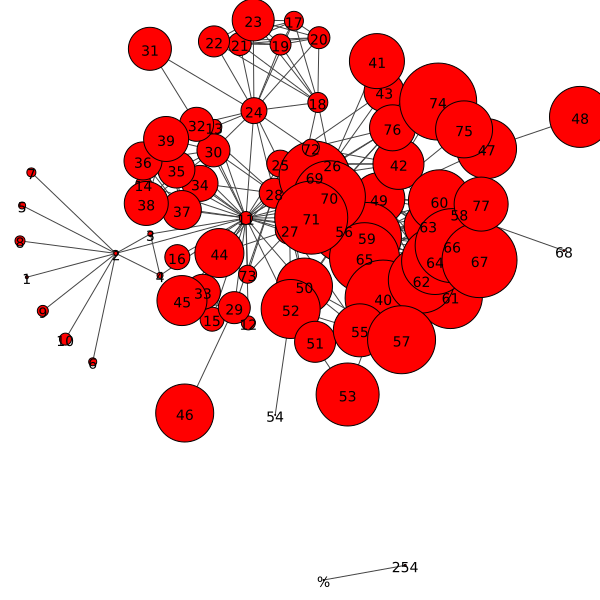

In [24]:
plot(g, layout = "kk", vertex_size = g.clo_cen)

#### Estimated closeness centrality using random walks

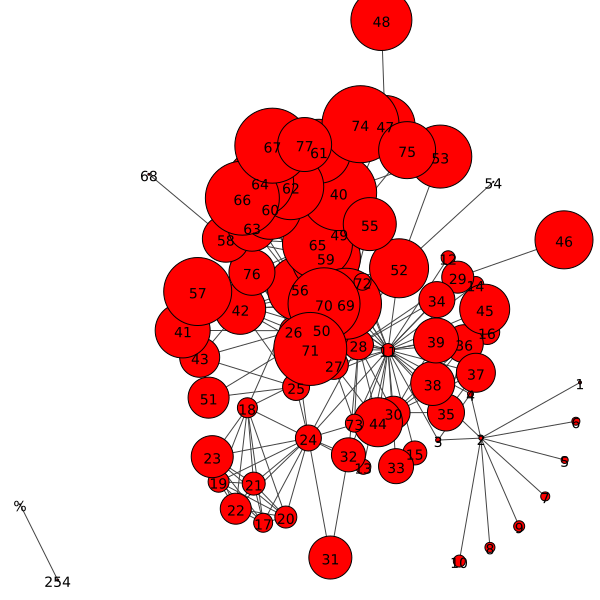

In [25]:
plot(g, layout = "kk", vertex_size = g.clo_cen_random_walk)

#### Betweenness centrality

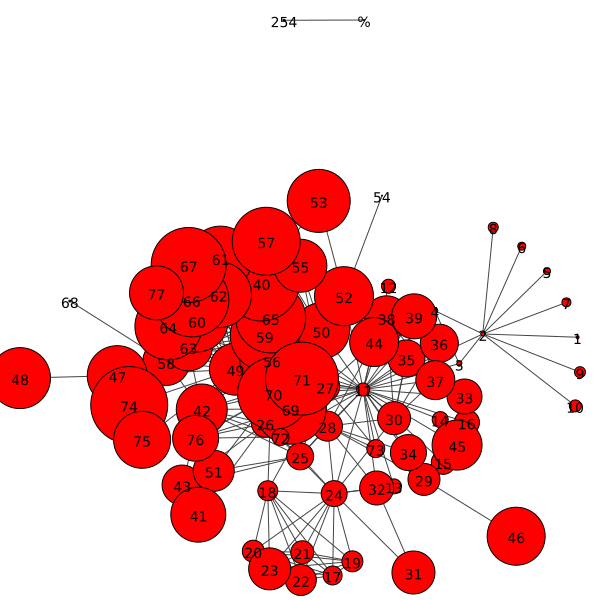

In [26]:
plot(g, layout = "kk", vertex_size = g.bet_cen)

#### Estimated betweenness centrality using random walks

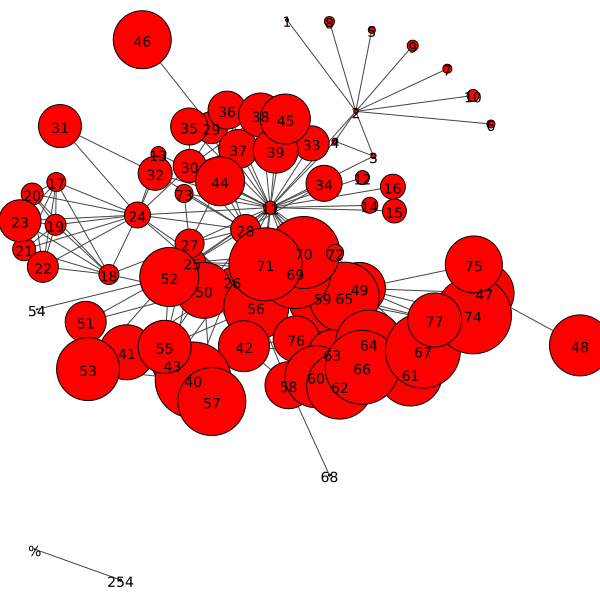

In [27]:
plot(g, layout = "kk", vertex_size = g.bet_cen_random_walk)

### Question 8- Bonaich Centrality

 Bonaich Centrality (also called as Eigenvector centrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.Google's PageRank and the Katz centrality are variants of the eigenvector centrality.

We used cfinder-google dataset for this question the reason being is ,to compare the results with pagerank values.

In [28]:
import csv
with open("./Datasets/cfinder-google/out.cfinder-google") as f:
    csvreader = csv.reader(f, delimiter = '\t')
    lines = [tuple(line[0].split()) for line in csvreader][2:]
Gm = igraph.Graph.TupleList(lines, directed =True)
Gm.vs['label']=[str(i) for i in range(Gm.vcount())]
Gm.evc=Gm.evcent()

In [29]:
def richclub(graph, fraction=0.001,highest=True, scores=None, indices_only=False):
    """Extracts the "rich club" of the given graph, i.e. the subgraph spanned
    between vertices having the top X% of some score.
 
    Scores are given by the vertex degrees by default.
 
    @param graph:    the graph to work on
    @param fraction: the fraction of vertices to extract; must be between 0 and 1.
    @param highest:  whether to extract the subgraph spanned by the highest or
                     lowest scores.
    @param scores:   the scores themselves. C{None} uses the vertex degrees.
    @param indices_only: whether to return the vertex indices only (and not the
                         subgraph)
    """
 
    if scores is None:
        scores = graph.pagerank()
 
    indices = list(range(graph.vcount()))
    indices.sort(key=scores.__getitem__)
 
    n = int(round(graph.vcount() * fraction))
    if highest:
        indices = indices[-n:]
    else:
        indices = indices[:n]
 
    if indices_only:
        return indices
 
    return graph.subgraph(indices)

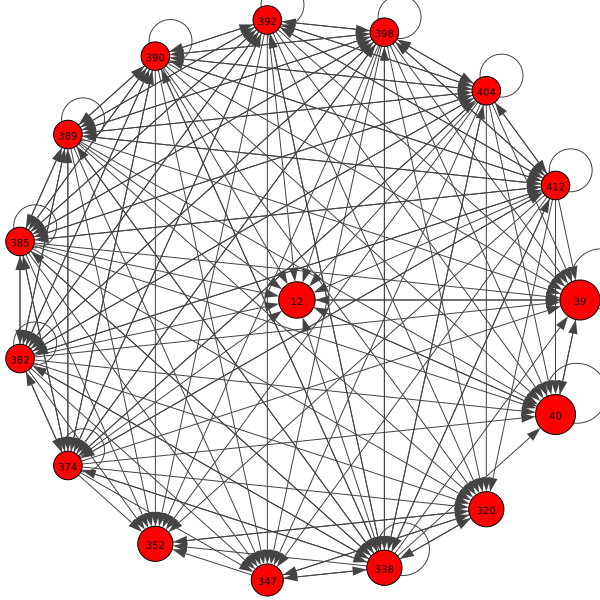

In [30]:
Gms=richclub(Gm,scores=Gm.evc)
Gms.evc=Gms.evcent()
Gms.evc=[40*i for i in Gms.evc]
layout = Gms.layout("star")
plot(Gms,layout=layout,vertex_size=Gms.evc,vertex_label_size = 10,edge_curved=False)

#### Observations:
For the same dataset the plots of bonaich centrality and pageranks are quite different.Both of these algorithms are trying to achive same goal (to find the influential nodes) but the results are different.

For hubbell centrality we used Train bombing dataset and the code is written in R language (as the inbuilt packages are not available in python) using centilib package.Open "Q8b.R" file in the same directory to find the code of hubbell centrality.

### Question 9 - DON
We use the same dataset used for other centrality measures earlier (Terrorist) to compare.

In [31]:
crimefile = open("Datasets/moreno_train/terrorist.txt", 'r')
names = [line.split('\n') for line in crimefile.readlines()]
terrorist_names = []
for i in names:
    terrorist_names.append(i[0])
    
with open("Datasets/moreno_train/out.moreno_train_train") as f:
    csvreader = csv.reader(f, delimiter = '\t')
    lines = [tuple(line[0].split()) for line in csvreader][2:]
    
Gm = igraph.Graph.TupleList(lines, directed = False,edge_attrs = ['weight'])
Gm.vs['label'] = terrorist_names # vertices are named with the terrorist names

###### Observation
It can be seen that DON graph is similar to the degree centrality graph.

"Jamal Zougam "


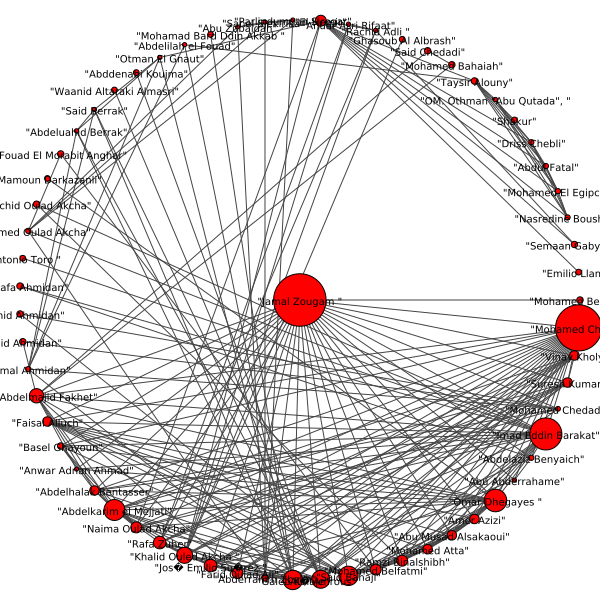

In [32]:
def don(g):   
    p = 0.1
    n = float(len(g.vs))
    don_values = []
    g.degree = g.degree()
    for i in range(len(g.vs)):
    #     n1 <- neighbors (g1, i)
        n1 = g.neighbors(g.vs[i])
        value = 1.0
        for j in range(len(n1)):
            d_i = float(g.degree[i])
            d_j = float(g.degree[j])
            value = value * ((1+d_i) / (1+d_j))
        don_values.append(1+ (math.log(value)) / (n * p))
    return don_values
    #     result.frame = rbind (result.frame, c (i, 1+ (log (value, base = exp (1))) / n * p))

don_vals = don(Gm)
Gm.deg = [10*i for i in don_vals] 
layout = Gm.layout("star")
out = plot(Gm,layout=layout,vertex_size=Gm.deg,vertex_label_size = 10)
out.save('Outputs/9.png')
print(terrorist_names[don_vals.index(max(don_vals))])
out

IMT2016057 Lakshmi Manonmaie

IMT2016072 Nomula Rohith Yogi

IMT2016110 Dachepalli Soumith Kumar

IMT2016078 Kalva Vaishnavi

IMT2016108 Arunaav
